<table><tr><th>
<div align="center" > 
    <div style="margin: 0 auto; display: inline-block">    
    <h1 align="center">Introduction to Python</h1>
    <h2 align="center">Pandas - Data Cleaning and Plotting Example</h2>
    <h3 align="center">Matthew Hielsberg</h3>
    <h3 align="center" style='color: #500000; font-family: open-sans; text-decoration: none;'><a style='color: #500000; font-family: open-sans; text-decoration: none;' href="https://www.math.tamu.edu">Department of Mathematics</a> &amp; <a style='color: #500000; font-family: open-sans; text-decoration: none;'  href="https://tamids.tamu.edu/">Institute of Data Science</a></h3>
</div>
</th>
<th>   
<div style="width:250px; display: inline-block;">
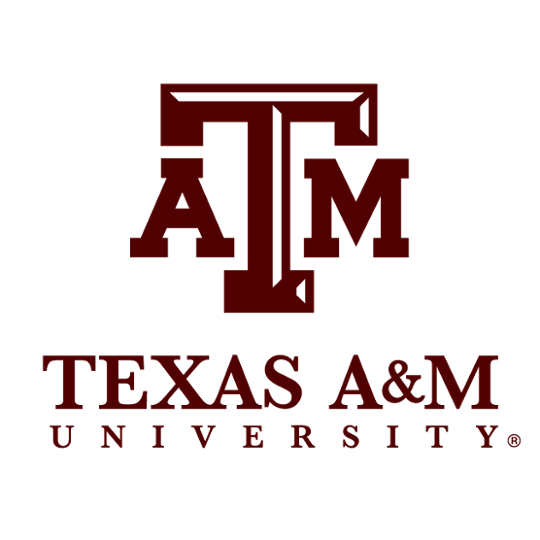 
    </div>
</div>
</th></tr></table>

In [ ]:
import pandas as pd
import numpy as np

## Random Data

For this example we are using a randomly generated data file.  The dataset consists of the positions and basic information of 100 unique entities (100 rows and 6 columns).  The data attributes are described as follows:

 - id: A unique sequence of 8 alphanumeric characters identifying the entity.
 - year: The year entity came online (1990 - 2022).
 - lat: The latitude of the entity's position on earth.
 - lon: The longitude of the entity's position on earth.
 - capability: A 4 character code identifying the entity's capabilities.
 - operational: A boolean (yes/no) indicating whether or not the entity functions.
 
 To download the csv file run the next block.

In [ ]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/hielsber-tamu/tamids-ds-bootcamp-python-0822/main/inv.csv", "inv.csv")

## Loading Data

Pandas offers a variety of loaders for common data formats.  The [Pandas Input / Output](https://pandas.pydata.org/pandas-docs/stable/reference/io.html) page in the API reference has information on all available functions for supported formats (e.g. [pickle](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_pickle.html#pandas.read_pickle), [table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_table.html#pandas.read_table), [csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv), [fixed width](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_fwf.html#pandas.read_fwf), [excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html#pandas.read_excel), [json](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html#pandas.read_json), [html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html#pandas.read_html), [sql](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html#pandas.read_sql), etc). 

[`pandas.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) reads a file containing comman-separated values into a DataFrame.  Notice that it assumes the first row are column labels.  There are a lot of options for how this function handles input files, for now we assume the defaults.

In [ ]:
df = pd.read_csv('inv.csv')
df

## Viewing and Summarizing Data

By default the output of a data frame consists of the "corners", where the middle rows/columns are represented by dots indicating that there are too many to be displayed.  If you would like to see the entire data frame you can use `set_option` with `display.max_rows` (similarly for columns), but this is not recommneded for large data frames.

In [ ]:
pd.set_option('display.max_rows', None)
df

In [ ]:
pd.set_option('display.max_rows', 10)

Rather than attempting to output the entire data frame we look at the 'corners' as we saw above, or we use the `head` or `tail` methods to help get a sense of the data.

In [ ]:
df.head(5)

### Label Summaries (index and columns)

The index and column labels can also be viewed.

In [ ]:
df.index

In [ ]:
df.columns

### Data Summaries (describe and info)

The [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) method shows a quick statistic summary of your data.  Notice how we can immediately see this data has outliers and missing data.

In [ ]:
df.describe()

In [ ]:
df.describe(include='all')

The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) function prints information about a DataFrame, including index and column dtypes, non-null values and memory usage. 

In [ ]:
df.info()

### Data Types

The [`dtypes`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) property returns a Series of data types for the columns in the dataframe.  

In this and the above call to info we see that several columns were given the data type `object`.  Pandas uses the `object` dtype for strings by default.  However, starting in v1.0.0 the [`StringDtype`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.StringDtype.html#pandas.StringDtype) extension type was added but is still considered experimental (see [Working with text data](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html)).  It is recommended to stay with dtype `object` for the time being and for backwards-compatibility.  This in no way inhibits our ability to work with this data as strings. 

In [ ]:
df.dtypes

## Data Cleaning

Before we export this data (and/or use it for any analysis), we can already see from the above summaries that this data has some issues.  We will attempt to address those issues in this section.

It should be noted that we will overwrite our input dataframe in these examples; this is not recommended in practice as you will want to verify your changes and have easy access to the original data without unnecessarily reloading it.  When cleaning your own data you should attempt to keep an original untouched dataframe and a separate 'clean' version, at least until you are satisfied that the clean version is a valid representation of the original.

### Incorrect Data Type

In this example we know that latitude should be numeric, but was given the dtype object.  We can see in the first few entries that there is at least one string in this column.  We could manually remove this, but the [`to_numeric`](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html) function has an argument `errors` that can be set to 'coerce', which replaces non-numeric values with NaN (missing).

In [ ]:
df.lat = pd.to_numeric(df.lat, errors='coerce')
df.info()

From the output of `df.info()` we now see the correct data type for lat, and if we view the first few rows of the data we can see that the row containing the string 'latitude' has been replaced with NaN.  In the next section we will actually remove all NaN (missing) values.

In [ ]:
df.head(5)

### Missing Data

To start we are only interested in rows containing complete data (this may be different for your application).  We can see from `info()` above that we do indeed have several rows with mising data.  To get an idea of how many NaN's are in the data we can use the [isna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isna.html) function and sum the total for all columns as follows:

In [ ]:
df.isna().sum()

To actually remove all rows that contain at least one missing entry we use the [`dropna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) function.

In [ ]:
df.dropna(inplace=True)

We can verify that this removed all rows containing at least one NA entry using `df.info()` as well as `isna().sum()`.

In [ ]:
df.info()

In [ ]:
df.isna().sum()

### Invalid Data

Looking again at the summary of the numerical data and taking into account the description of the data, we see that several rows contain data that is out of bounds.

In [ ]:
df.describe()

The years column should only have data from the range 1990 to 2022.  The statistics above show that the min and max values are outside of this range.  We can trim the invalid rows using a mask or boolean index.

In [ ]:
df = df[(df.year >= 1990) & (df.year <= 2022)]

df.describe()

Similarly the latitude should be in the range -90 to 90 and the longitude should be in the range -180 to 180.

In [ ]:
df = df[(df.lat >= -90) & (df.lat <= 90)]
df = df[(df.lon >= -180) & (df.lon <= 180)]

df.describe()

### Categorical Data

Some of our columns contain a limited, fixed number of possible values.  As such we would like to set their data type to [`pandas.Categorical`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Categorical.html) (see the Pandas User Guide on [Categorical data](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html?highlight=categorical) for a description).

We can specify the data types when loading the csv file (see the dtype argument in [`pandas.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), however we can also use [`pandas.DataFrame.astype`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) to modify the data frame after the data has been loaded.

Recall the summary data provided by `df.describe(include='all')`.  

In [ ]:
df.describe(include='all')

We can see that the columns `capability` and `operational` contains 6 and 10 unique values, respectively.  If we use the [`value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html) function we can see the set of unique values and the number of occurences of each.

In [ ]:
df.capability.value_counts()  

In [ ]:
df.operational.value_counts()

The capability column appears to already have unique values, but the operational column should really only contain 'Y' or 'N'.  To correct this we will use the [replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) function.

In [ ]:
df.operational.replace({'yes':'Y', 'YES':'Y', 'Yes':'Y', 'y':'Y', 'no':'N', 'NO':'N', 'No':'N', 'n':'N'}, inplace=True)

df.operational.value_counts()

With the number of unique items corrected for these two columns we can now use [`pandas.DataFrame.astype`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) to modify the data type for those columns.

In [ ]:
df.capability = df.capability.astype('category')
df.operational = df.operational.astype('category')

df.info()

In [ ]:
df.capability.cat.categories

In [ ]:
df.operational.cat.categories

In [ ]:
df.describe(include='all')

### Setting the Index

To this point we have used the default numeric index for our data frame, but our data has a unique set of ID's built in.  It may be nice/convenient to use these ID's in our code when referencing particular rows.  The [`set_index`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html) function can help us here:

In [ ]:
df.set_index('id', inplace=True)
df

## Writing Data

Pandas DataFrames support a number of [serialization / IO / conversion](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#serialization-io-conversion) functions, including writing to csv formats using [`to_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html#pandas.DataFrame.to_csv).

In [ ]:
df.to_csv('inv_clean.csv')

## Plotting

Pandas also supports plotting using [MatPlotLib](https://matplotlib.org).  There are numerous tutorials on plotting with tons of examples:
- [Python Graph Gallery](https://python-graph-gallery.com)
- [matplotlib tutorial page](https://matplotlib.org/3.3.1/tutorials/index.html)
- [Seaborn Official Tutorial](https://seaborn.pydata.org/tutorial.html)
- [plotnine Tutorials](https://plotnine.readthedocs.io/en/stable/tutorials.html)
- [Altair](https://altair-viz.github.io/)
- many others.

Plotnine is a Python implementation of the [Grammar for Graphics](https://link.springer.com/book/10.1007%2F0-387-28695-0) and was inspired by ggplot2.  

As an example using our data we can create basic plots simply using the [plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) function directly from our data frame.

In [ ]:
df.plot(y='lat', kind='hist')

We can even map our categorical data to colors and other plot features to give even more information.

In [ ]:
colors = {'Y':'green', 'N':'red'}
df.plot(x='lon', y='lat', kind='scatter', style='o', c=df['operational'].map(colors))

### Cartopy

Cartopy is not a plotting package, but is included here because our data set includes latitude and longitude.  We can use Cartopy with Matplotlib to generate plots using maps.

In [ ]:
!pip install cartopy

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.stock_img()
    
x,y = df.lon.to_list(), df.lat.to_list()
colors = {'Y':'green', 'N':'red'}

ax.scatter(x, y, marker='D', c=df['operational'].map(colors), s=20, transform=ccrs.PlateCarree())

### Matplotlib

[matplotlib.pyplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot) contains many functions that are designed to function similarly to MATLAB.  Plots can be in 2D or 3D and each function call modifies an existing figure.

The following examples (or very similar) can also be found in the [Intro to pyplot tuotrial](https://matplotlib.org/tutorials/introductory/pyplot.html).  More tutorials and examples can be found on the [matplotlib tutorial](https://matplotlib.org/tutorials/index.html) page.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data = list(range(1,10))

plt.plot(data)  # single list is assumed to by y-values
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Title')
plt.show()

In [ ]:
# specify both x and y data
plt.plot(data, [x**2 for x in data]) 
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Title')
plt.show()

In [ ]:
import numpy as np

d = np.array(data)

labels = ['$d$', '$d^2$', '$d^3$']

plt.plot(d, d, '--', d, d**2, 'rs', d, d**3, 'g^') 
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Title')
plt.legend(labels)
plt.show()

### Seaborn

[Seaborn](https://seaborn.pydata.org/index.html) is a visualization library built on matplotlib.

The example below comes from the [intro to seaborn](https://seaborn.pydata.org/introduction.html) tutorial page.

At the time of writing the version of Seaborn included in Colab was not the latest and did not include features like `set_theme`.  Use the following to upgrade seaborn.

In [ ]:
!pip install seaborn --upgrade

In [ ]:

# Import seaborn
import seaborn as sns

# Load an example dataset
tips = sns.load_dataset("tips") 

tips

In [ ]:
# Apply the default theme
sns.set_theme()
# Create a visualization (relational plot)
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

Seaborn has a number of plot types and tools.  Another example is [`pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot) that shows joint and marginal distributions for all pairwaise relationships in a data set.  

In [ ]:
penguins = sns.load_dataset("penguins")

sns.pairplot(data=penguins, hue="species")

### Plotnine

[Plotnine](https://plotnine.readthedocs.io/en/stable/index.html) is a Python implementation of a grammar of graphics, based on ggplot2.

The following examples come from the plotnine documentation and tutorial pages.

If plotnine is not installed, check out the [installation instructions](https://plotnine.readthedocs.io/en/stable/installation.html).  

In [ ]:
!pip install plotnine

In [ ]:
import pandas as pd
import numpy as np
from plotnine import *

In [ ]:
from plotnine.data import mtcars

mtcars

In [ ]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, labels

(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()             # add the data points
 + stat_smooth(method='lm') # add the smoothed conditioned mean
 + facet_wrap('~gear')      # separate into three plots
 + labels.xlab('Weight (1000 lbs)')   # Change the x-label
)

MIT License

Copyright (c) 2022 Department of Mathematics, Texas A&M University

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and
associated documentation files (the "Software"), to deal in the Software without restriction, including
without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of
the Software, and to permit persons to whom the Software is furnished to do so, subject to the following
conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions
of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS
FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN
AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION
WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.